In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
history = pd.read_csv("searching/249/equity.csv")

In [12]:
history.balance[history.balance != 1e20] 

Series([], Name: balance, dtype: float64)

In [128]:
history.set_index("date", inplace=True)
history.index = pd.to_datetime(history.index)

In [129]:
long_hist = history[history.signal=="buy"].pnl.cumsum()
short_hist = history[history.signal=="sell"].pnl.cumsum()

In [130]:
long_asset = (long_hist + (6000))
short_asset = (short_hist + (6000))

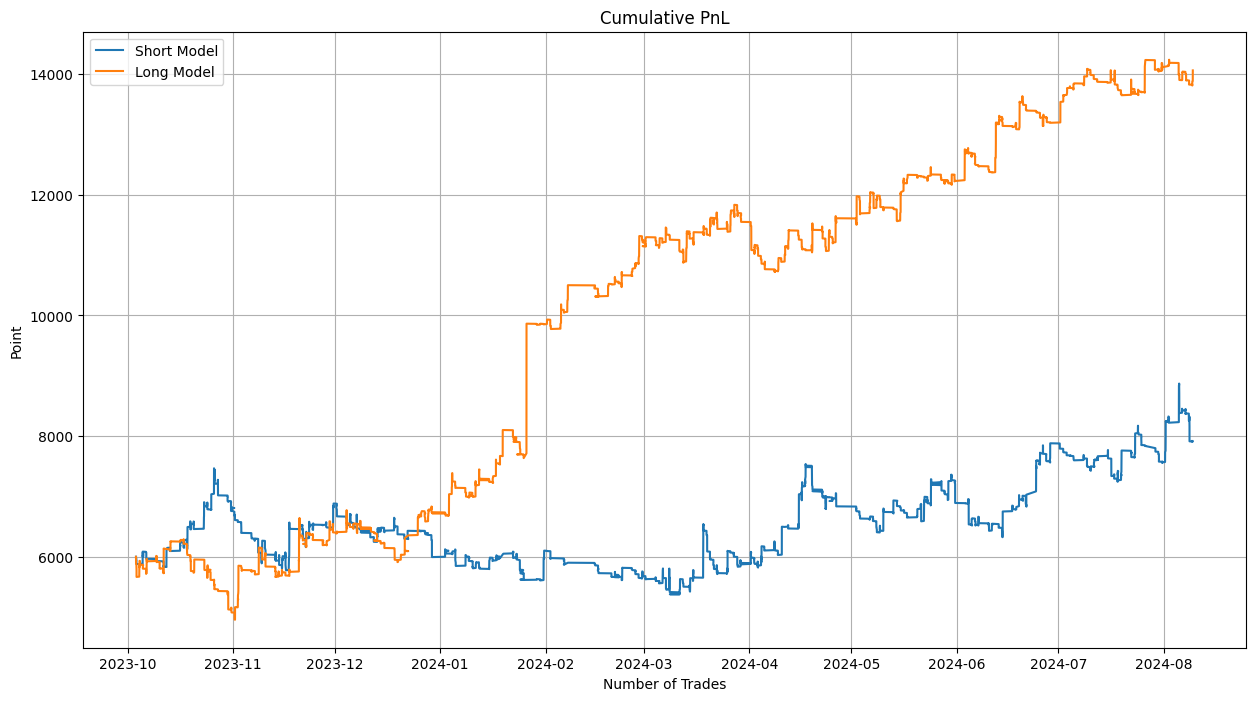

In [131]:
plt.figure(figsize=(15, 8))

plt.plot(short_asset, label="Short Model")
plt.plot(long_asset, label="Long Model")

plt.legend()
plt.grid()

plt.ylabel("Point")
plt.xlabel("Number of Trades")
plt.title("Cumulative PnL")
plt.show()

/tmp/ipykernel_2001/866128287.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = long_asset.resample("1D").last().pct_change()


<Axes: title={'center': 'Monthly Returns'}, xlabel='date'>

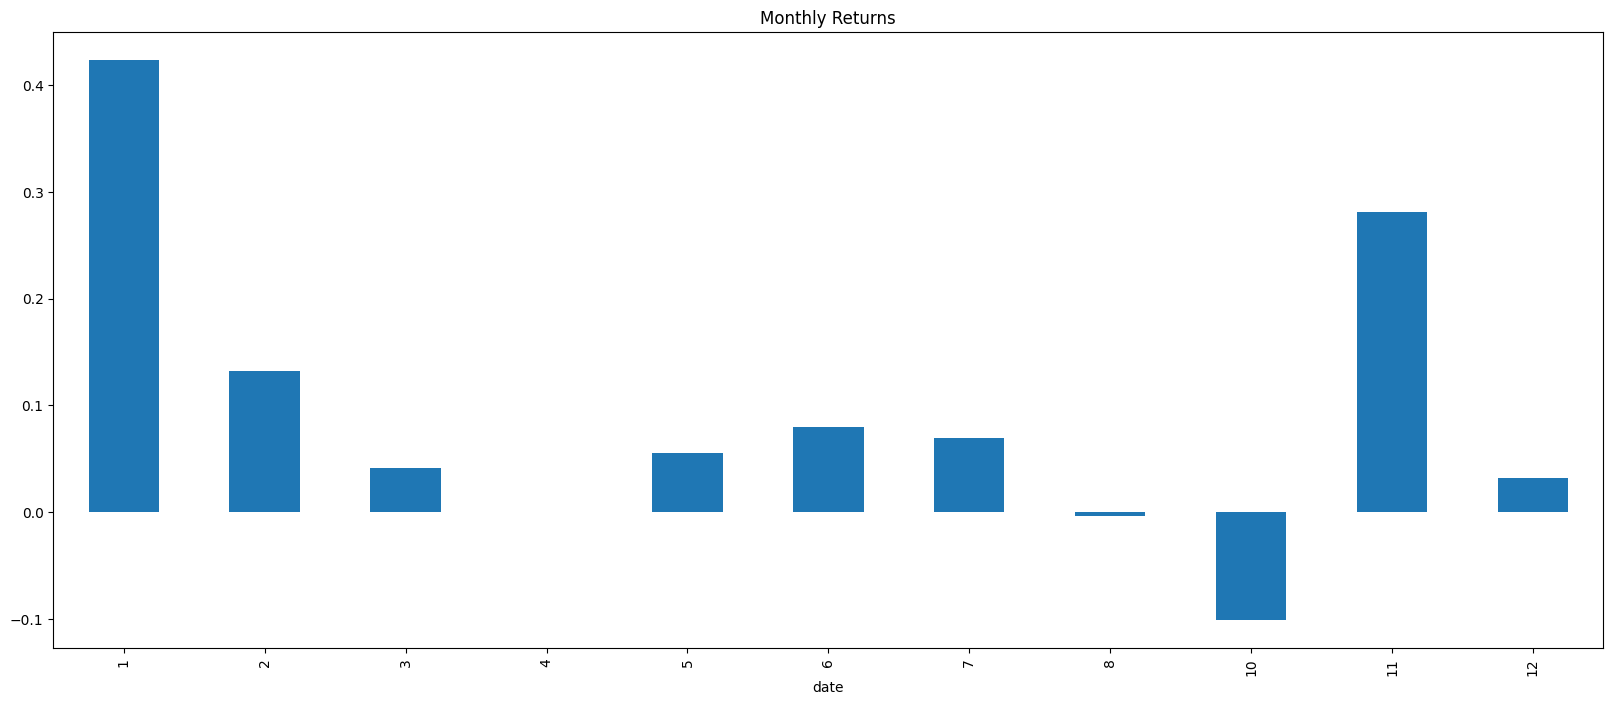

In [133]:
returns = long_asset.resample("1D").last().pct_change()
plt.figure(figsize=(20, 8))
returns.groupby(returns.index.month).sum().plot(kind="bar", title="Monthly Returns")

In [112]:
mean_return = short_asset.resample("1D").last().pct_change().mean()
std = short_asset.resample("1D").last().pct_change().std()

/tmp/ipykernel_2001/3531956252.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  mean_return = short_asset.resample("1D").last().pct_change().mean()
/tmp/ipykernel_2001/3531956252.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  std = short_asset.resample("1D").last().pct_change().std()


In [113]:
np.sqrt(252) * mean_return / std

np.float64(1.38355725714899)

In [114]:
yearly_return = mean_return * 25
yearly_return * 100

np.float64(3.77079323430496)

In [115]:
mdd = (long_asset / long_asset.cummax() - 1).min()
mdd

np.float64(-0.34028247885093155)

In [116]:
len(long_hist)

9888

In [100]:
(long_asset[-1] / long_asset[0] - 1) * 100

/tmp/ipykernel_2001/1661854102.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (long_asset[-1] / long_asset[0] - 1) * 100


np.float64(134.57562046254478)